**In the earlier steps, multiple images were detected in some images as a result of which HAAR cascades were not even performed for some of the training and testing images. Here I am checking the training images for which the HAAR cascades were not extracted, and am going to extract the same for them.**

# Setting the path

In [0]:
import os
import shutil

In [0]:
import pandas as pd
import numpy as np
import cv2

In [0]:
import time

In [0]:
pd.set_option('max_colwidth', -1)

In [63]:
%cd drive/

[Errno 2] No such file or directory: 'drive/'
/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [4]:
%cd My\ Drive

/content/drive/My Drive


In [5]:
%cd case\ studies\ 2

/content/drive/My Drive/case studies 2


In [6]:
!ls

'1-Gathering Data.ipynb'	       'Data Augmentation'
'2-Gathering files information.ipynb'  'Face Dataset'
'3-Data Pre-Processing.ipynb'	        Final_Face_Dataset
'4-Gathering Raw Waveforms.ipynb'       mel_spectrograms
'5-Concatenating Raw Waveforms.ipynb'   raw_data


In [7]:
%cd Final_Face_Dataset/

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [8]:
%cd HAAR_features/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/HAAR_features


In [0]:
!ls

In [65]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [66]:
!ls

 final_test_data.csv				      HAAR_features_test
 final_training_data.csv			      pending_training_HAAR
'HAAR Feature Extraction for Test Images.ipynb'       testing_set
'HAAR Feature Extraction for Training Images.ipynb'   training_set
 HAAR_features					      Untitled0.ipynb


# Checking the training images for which HAAR cascades were missed

In [67]:
training_df = pd.read_csv('final_training_data.csv')
training_df.head()

,Unnamed: 0,images,labels,label_count
0,23506,Yoriko_Kawaguchi - _0_1828.jpg,Yoriko_Kawaguchi,252
1,18146,Yoriko_Kawaguchi - _0_731.jpg,Yoriko_Kawaguchi,252
2,18157,Yoriko_Kawaguchi - _0_4306.jpg,Yoriko_Kawaguchi,252
3,18156,Yoriko_Kawaguchi - _0_7914.jpg,Yoriko_Kawaguchi,252
4,18155,Yoriko_Kawaguchi - _0_7951.jpg,Yoriko_Kawaguchi,252


In [68]:
del training_df['Unnamed: 0']
del training_df['label_count']
training_df.head()

,images,labels
0,Yoriko_Kawaguchi - _0_1828.jpg,Yoriko_Kawaguchi
1,Yoriko_Kawaguchi - _0_731.jpg,Yoriko_Kawaguchi
2,Yoriko_Kawaguchi - _0_4306.jpg,Yoriko_Kawaguchi
3,Yoriko_Kawaguchi - _0_7914.jpg,Yoriko_Kawaguchi
4,Yoriko_Kawaguchi - _0_7951.jpg,Yoriko_Kawaguchi


In [69]:
!ls

 final_test_data.csv				      HAAR_features_test
 final_training_data.csv			      pending_training_HAAR
'HAAR Feature Extraction for Test Images.ipynb'       testing_set
'HAAR Feature Extraction for Training Images.ipynb'   training_set
 HAAR_features					      Untitled0.ipynb


In [70]:
%cd HAAR_features/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/HAAR_features


In [71]:
!ls

images_0_7000.npy	labels_0_7000.npy	roi_0_7000.npy
images_24000_28000.npy	labels_24000_28000.npy	roi_24000_28000.npy
images_28000_33000.npy	labels_28000_33000.npy	roi_28000_33000.npy
images_33000_38000.npy	labels_33000_38000.npy	roi_33000_38000.npy
images_38000_rest.npy	labels_38000_rest.npy	roi_38000_rest.npy
images_7000_24000.npy	labels_7000_24000.npy	roi_7000_24000.npy


In [0]:
images_0_7000 = np.load('images_0_7000.npy')
images_7000_24000 = np.load('images_7000_24000.npy')
images_24000_28000 = np.load('images_24000_28000.npy')
images_28000_33000 = np.load('images_28000_33000.npy')
images_33000_38000 = np.load('images_33000_38000.npy')
images_38000_rest = np.load('images_38000_rest.npy')
images = np.concatenate([images_0_7000, images_7000_24000, images_24000_28000, images_28000_33000, images_33000_38000, images_38000_rest])

In [0]:
labels_0_7000 = np.load('labels_0_7000.npy')
labels_7000_24000 = np.load('labels_7000_24000.npy')
labels_24000_28000 = np.load('labels_24000_28000.npy')
labels_28000_33000 = np.load('labels_28000_33000.npy')
labels_33000_38000 = np.load('labels_33000_38000.npy')
labels_38000_rest = np.load('labels_38000_rest.npy')
labels = np.concatenate([labels_0_7000, labels_7000_24000, labels_24000_28000, labels_28000_33000, labels_33000_38000, labels_38000_rest])

In [0]:
roi_0_7000 = np.load('roi_0_7000.npy', allow_pickle = True)
roi_7000_24000 = np.load('roi_7000_24000.npy', allow_pickle = True)
roi_24000_28000 = np.load('roi_24000_28000.npy', allow_pickle = True)
roi_28000_33000 = np.load('roi_28000_33000.npy', allow_pickle = True)
roi_33000_38000 = np.load('roi_33000_38000.npy', allow_pickle = True)
roi_38000_rest = np.load('roi_38000_rest.npy', allow_pickle = True)
roi = np.concatenate([roi_0_7000, roi_7000_24000, roi_24000_28000, roi_28000_33000, roi_33000_38000, roi_38000_rest])

In [75]:
len(images)

41741

In [76]:
len(labels)

41741

In [77]:
len(roi)

41741

In [78]:
len(training_df)

42500

In [79]:
haar_df = pd.DataFrame(columns = ['images', 'labels'])
haar_df['images'] = images
haar_df['labels'] = labels
haar_df['image_count'] = haar_df['images'].map(haar_df['images'].value_counts(dropna = False))
haar_df['label_count'] = haar_df['labels'].map(haar_df['labels'].value_counts(dropna = False))
haar_df.head()

,images,labels,image_count,label_count
0,Saddam_Hussein - _0_1941.jpg,Saddam_Hussein,1,235
1,Colin_Powell - _0_2502.jpg,Colin_Powell,1,241
2,Tommy_Franks - _0_8107.jpg,Tommy_Franks,1,260
3,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos,2,282
4,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos,2,282


In [80]:
haar_df.loc[haar_df['label_count'] == 250]

,images,labels,image_count,label_count


In [81]:
haar_df.loc[haar_df['image_count']>1]['image_count'].unique()

array([2, 3, 4, 5])

In [0]:
unique_images = haar_df['images'].unique()

In [83]:
training_df.head()

,images,labels
0,Yoriko_Kawaguchi - _0_1828.jpg,Yoriko_Kawaguchi
1,Yoriko_Kawaguchi - _0_731.jpg,Yoriko_Kawaguchi
2,Yoriko_Kawaguchi - _0_4306.jpg,Yoriko_Kawaguchi
3,Yoriko_Kawaguchi - _0_7914.jpg,Yoriko_Kawaguchi
4,Yoriko_Kawaguchi - _0_7951.jpg,Yoriko_Kawaguchi


In [0]:
present = []

for i in training_df['images']:
  if i in unique_images:
    present.append('yes')
  else:
    present.append('no')
training_df['present'] = present

In [85]:
training_df.head()

,images,labels,present
0,Yoriko_Kawaguchi - _0_1828.jpg,Yoriko_Kawaguchi,yes
1,Yoriko_Kawaguchi - _0_731.jpg,Yoriko_Kawaguchi,yes
2,Yoriko_Kawaguchi - _0_4306.jpg,Yoriko_Kawaguchi,yes
3,Yoriko_Kawaguchi - _0_7914.jpg,Yoriko_Kawaguchi,yes
4,Yoriko_Kawaguchi - _0_7951.jpg,Yoriko_Kawaguchi,yes


In [0]:
pending_haar_df = training_df.loc[training_df['present'] == 'no']

In [87]:
pending_haar_df.head()

,images,labels,present
62,Yoriko_Kawaguchi - _0_2504.jpg,Yoriko_Kawaguchi,no
63,Yoriko_Kawaguchi - _0_7105.jpg,Yoriko_Kawaguchi,no
66,Yoriko_Kawaguchi - _0_1156.jpg,Yoriko_Kawaguchi,no
68,Yoriko_Kawaguchi - _0_4876.jpg,Yoriko_Kawaguchi,no
69,Yoriko_Kawaguchi - _0_9068.jpg,Yoriko_Kawaguchi,no


In [0]:
pending_haar_df = pending_haar_df.reset_index(drop = True)

**Now these are the training images for which HAAR extraction was missed.**

# HAAR extraction for the remaining images

In [106]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [40]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [41]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [0]:
face_cascade = cv2.CascadeClassifier(os.path.join(os.getcwd(), 'haarcascade_frontalface_default.xml'))

In [43]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [0]:
os.mkdir('pending_training_HAAR')

In [45]:
%cd pending_training_HAAR/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/pending_training_HAAR


In [0]:
haar_path = os.getcwd()

In [47]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [48]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [58]:
images = []
labels = []
roi = []


start = time.time()

for i in range(len(pending_haar_df)):
  try:
    img = cv2.imread(pending_haar_df['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi.append(roi_img)
      labels.append(pending_haar_df['labels'][i])
      images.append(pending_haar_df['images'][i])
      if len(images)%500 == 0:
        print(len(images))
        print(time.time() - start)
  except Exception as e:
    pass
    
  

np.save(os.path.join(haar_path, 'roi'), roi)
np.save(os.path.join(haar_path, 'labels'), labels)
np.save(os.path.join(haar_path, 'images'), images)

df = pd.DataFrame(columns = ['images'])
df['images'] = images
print(df['images'].value_counts(dropna = False))
print(len(df))

Series([], Name: images, dtype: int64)
0


In [90]:
pending_haar_df.head()

,images,labels,present
0,Yoriko_Kawaguchi - _0_2504.jpg,Yoriko_Kawaguchi,no
1,Yoriko_Kawaguchi - _0_7105.jpg,Yoriko_Kawaguchi,no
2,Yoriko_Kawaguchi - _0_1156.jpg,Yoriko_Kawaguchi,no
3,Yoriko_Kawaguchi - _0_4876.jpg,Yoriko_Kawaguchi,no
4,Yoriko_Kawaguchi - _0_9068.jpg,Yoriko_Kawaguchi,no


In [0]:
cv2.imread('Yoriko_Kawaguchi - _0_2504.jpg')

In [92]:
pending_haar_df.tail()

,images,labels,present
5635,Abdullah_Gul - _0_3818.jpg,Abdullah_Gul,no
5636,Abdullah_Gul - _0_5148.jpg,Abdullah_Gul,no
5637,Abdullah_Gul - _0_6481.jpg,Abdullah_Gul,no
5638,Abdullah_Gul - _0_2779.jpg,Abdullah_Gul,no
5639,Abdullah_Gul - _0_7928.jpg,Abdullah_Gul,no


In [93]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/HAAR_features


In [94]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [95]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [0]:
cv2.imread('Abdullah_Gul - _0_7928.jpg')

In [97]:
images = []
labels = []
roi = []


start = time.time()

for i in range(len(pending_haar_df)):
  
  img = cv2.imread(pending_haar_df['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi.append(roi_img)
    labels.append(pending_haar_df['labels'][i])
    images.append(pending_haar_df['images'][i])
    if len(images)%500 == 0:
      print(len(images))
      print(time.time() - start)
  
    
  

np.save(os.path.join(haar_path, 'roi'), roi)
np.save(os.path.join(haar_path, 'labels'), labels)
np.save(os.path.join(haar_path, 'images'), images)

df = pd.DataFrame(columns = ['images'])
df['images'] = images
print(df['images'].value_counts(dropna = False))
print(len(df))

error: ignored

In [103]:
pending_haar_df.head()

,images,labels,present
0,Yoriko_Kawaguchi - _0_2504.jpg,Yoriko_Kawaguchi,no
1,Yoriko_Kawaguchi - _0_7105.jpg,Yoriko_Kawaguchi,no
2,Yoriko_Kawaguchi - _0_1156.jpg,Yoriko_Kawaguchi,no
3,Yoriko_Kawaguchi - _0_4876.jpg,Yoriko_Kawaguchi,no
4,Yoriko_Kawaguchi - _0_9068.jpg,Yoriko_Kawaguchi,no


In [104]:
pending_haar_images = []
pending_haar_labels = []

for i in pending_haar_df['images']:
  pending_haar_images.append(i)
for i in pending_haar_df['labels']:
  pending_haar_labels.append(i)
print(len(pending_haar_df))
print(len(pending_haar_images))
print(len(pending_haar_labels))

5640
5640
5640


In [126]:
images = []
labels = []
roi = []
color = []

start = time.time()

for i in (pending_haar_images):
  img = cv2.imread(i)
  #color.append(img)
  #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(img)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi.append(roi_img)
    #labels.append(pending_haar_labels[i])
    images.append(pending_haar_images[i])

    if len(images)%100 == 0:
      print(len(images))
      print(time.time() - start)

KeyboardInterrupt: ignored

In [0]:
img = cv2.imread(os.listdir(os.getcwd())[0])

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

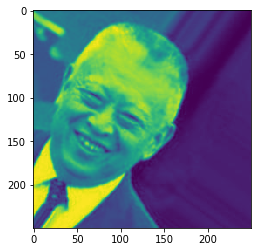

In [162]:
import matplotlib.pyplot as plt
plt.imshow(gray)

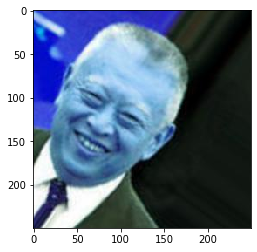

In [163]:
plt.imshow(img)

In [0]:
face = face_cascade.detectMultiScale(gray, 1.3, 5)

In [165]:
face

()

In [159]:
gray

array([[  4,   4,   4, ...,   2,   3,   3],
       [  4,   4,   4, ...,   2,   3,   3],
       [  4,   4,   4, ...,   2,   3,   3],
       ...,
       [240, 239, 238, ...,   1,   0,   0],
       [239, 237, 235, ...,   2,   1,   1],
       [239, 237, 235, ...,   2,   1,   1]], dtype=uint8)

In [141]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [0]:
!cat haarcascade_frontalface_default.xml

In [167]:
haar_df.head()

,images,labels,image_count,label_count
0,Saddam_Hussein - _0_1941.jpg,Saddam_Hussein,1,235
1,Colin_Powell - _0_2502.jpg,Colin_Powell,1,241
2,Tommy_Franks - _0_8107.jpg,Tommy_Franks,1,260
3,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos,2,282
4,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos,2,282


In [168]:
haar_df['label_count'].min()

201

In [169]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [171]:
haar_df.head()

,images,labels,image_count,label_count
0,Saddam_Hussein - _0_1941.jpg,Saddam_Hussein,1,235
1,Colin_Powell - _0_2502.jpg,Colin_Powell,1,241
2,Tommy_Franks - _0_8107.jpg,Tommy_Franks,1,260
3,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos,2,282
4,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos,2,282


In [172]:
haar_df['labels'].nunique()

170

In [0]:
unique_image_count = haar_df.loc[haar_df['image_count']>1]['image_count'].unique()

In [180]:
unique_image_count

array([2, 3, 4, 5])

In [0]:
roi = np.concatenate([roi_0_7000, roi_7000_24000, roi_24000_28000, roi_28000_33000, roi_33000_38000, roi_38000_rest])

In [0]:
haar_df_2 = haar_df.loc[haar_df['image_count'] == 2]

In [182]:
haar_df_2.shape

(8232, 4)

In [183]:
haar_df_2.head()

,images,labels,image_count,label_count
3,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos,2,282
4,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos,2,282
11,Alvaro_Uribe - _0_6813.jpg,Alvaro_Uribe,2,295
12,Alvaro_Uribe - _0_6813.jpg,Alvaro_Uribe,2,295
17,Nestor_Kirchner - _0_1742.jpg,Nestor_Kirchner,2,283


In [222]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [223]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [0]:
img = cv2.imread('Nicanor_Duarte_Frutos - _0_8057.jpg')

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [0]:
faces = face_cascade.detectMultiScale(gray)

In [235]:
len(faces)

2

In [0]:
roi = []
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
  roi_img = img[y:y+h, x:x+w]
  #print(roi_img.shape)
  roi.append(roi_img)
del roi[0]

In [240]:
len(roi)

1

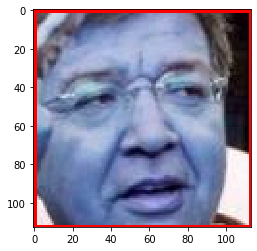

In [241]:
plt.imshow(roi[0])

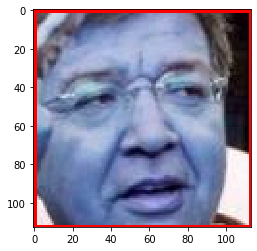

In [232]:
plt.imshow(roi[1])

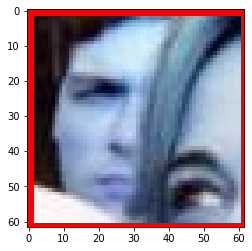

In [184]:
plt.imshow(roi[3])

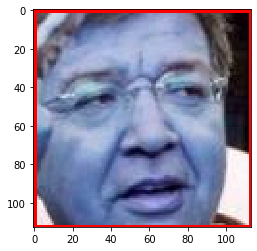

In [185]:
plt.imshow(roi[4])

In [217]:
haar_df_2.loc[haar_df_2['labels'].str.contains('Nicanor')].sort_values('images', ascending = False).groupby('images').tail(1)

,images,labels,image_count,label_count
2431,Nicanor_Duarte_Frutos - _0_9969.jpg,Nicanor_Duarte_Frutos,2,282
28134,Nicanor_Duarte_Frutos - _0_9951.jpg,Nicanor_Duarte_Frutos,2,282
4331,Nicanor_Duarte_Frutos - _0_9847.jpg,Nicanor_Duarte_Frutos,2,282
15774,Nicanor_Duarte_Frutos - _0_9749.jpg,Nicanor_Duarte_Frutos,2,282
9784,Nicanor_Duarte_Frutos - _0_9622.jpg,Nicanor_Duarte_Frutos,2,282
20684,Nicanor_Duarte_Frutos - _0_9211.jpg,Nicanor_Duarte_Frutos,2,282
34479,Nicanor_Duarte_Frutos - _0_8973.jpg,Nicanor_Duarte_Frutos,2,282
37997,Nicanor_Duarte_Frutos - _0_8932.jpg,Nicanor_Duarte_Frutos,2,282
39251,Nicanor_Duarte_Frutos - _0_8852.jpg,Nicanor_Duarte_Frutos,2,282
24257,Nicanor_Duarte_Frutos - _0_8591.jpg,Nicanor_Duarte_Frutos,2,282


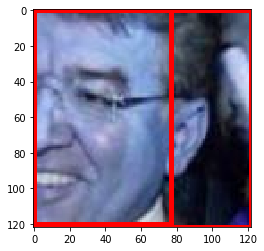

In [221]:
plt.imshow(roi[1434])

In [244]:
image = []
faces_found = []
for i in os.listdir(os.getcwd()):
  try:
    img = cv2.imread(i)
    gray = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    faces_found.append(faces)
    image.append(i)
    if len(image)%50 == 0:
      print(len(image))
  except Exception as e:
    pass

KeyboardInterrupt: ignored

In [245]:
image

[]

In [246]:
training_df.head()

,images,labels,present
0,Yoriko_Kawaguchi - _0_1828.jpg,Yoriko_Kawaguchi,yes
1,Yoriko_Kawaguchi - _0_731.jpg,Yoriko_Kawaguchi,yes
2,Yoriko_Kawaguchi - _0_4306.jpg,Yoriko_Kawaguchi,yes
3,Yoriko_Kawaguchi - _0_7914.jpg,Yoriko_Kawaguchi,yes
4,Yoriko_Kawaguchi - _0_7951.jpg,Yoriko_Kawaguchi,yes


In [247]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [254]:
image = []
faces_found = []
for i in training_df['images']:
  try:
    img = cv2.imread(i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    faces_found.append(len(faces))
    image.append(i)
    if len(image)%1000 == 0:
      print(len(image))
  except Exception as e:
    image.append(i)
    faces_found.append('Error in image')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


KeyboardInterrupt: ignored

In [255]:
df = pd.DataFrame(columns = ['image', 'faces_found'])
df['image'] = image
df['faces_found'] = faces_found
df.head()

,image,faces_found
0,Yoriko_Kawaguchi - _0_1828.jpg,1
1,Yoriko_Kawaguchi - _0_731.jpg,1
2,Yoriko_Kawaguchi - _0_4306.jpg,1
3,Yoriko_Kawaguchi - _0_7914.jpg,1
4,Yoriko_Kawaguchi - _0_7951.jpg,1


In [256]:
df['faces_found'].unique()

array([1, 2, 0, 'Error in image', 3], dtype=object)

In [261]:
df.loc[df['faces_found'] == 2]

,image,faces_found
5,Yoriko_Kawaguchi - _0_9198.jpg,2
6,Yoriko_Kawaguchi - _0_7172.jpg,2
43,Yoriko_Kawaguchi - _0_3253.jpg,2
46,Yoriko_Kawaguchi - _0_3976.jpg,2
47,Yoriko_Kawaguchi - _0_1227.jpg,2
...,...,...
19576,Julie_Gerberding - _0_7143.jpg,2
19748,Julie_Gerberding - _0_3911.jpg,2
19941,Julianne_Moore - _0_1470.jpg,2
19984,Julianne_Moore - _0_1666.jpg,2


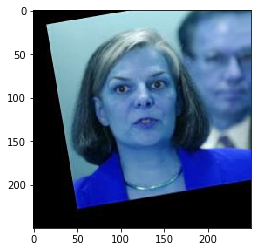

In [262]:
plt.imshow(cv2.imread('Julie_Gerberding - _0_7143.jpg'))